### **About Dataset**

A consulting firm working for Southwest Airlines would like to predict airfares using **Airfares.csv**, which contains data between Q3-1996 and Q2-1997. The variables in these data are listed below. Some airport-to-airport data (e.g., JFK-BWI) are available, but most data are at the city-to-city level (e.g., Atlanta-Boston). A key question is whether the presence or absence of Southwest Airlines (a low-cost entrant) would have any effect on fare. 

### **Variable Description**:

**S_CODE** : Starting airport’s code

**S_CITY** : Starting city

**E_CODE** : Ending airport’s code

**E_CITY** : Ending city

**COUPON** : Average number of coupons for that route (a one-coupon flight is a nonstop flight, a two-coupon flight is a one-stop flight, etc.)

**NEW** : Number of new carriers entering that route between Q3-96 and Q2-97

**VACATION** : Whether (Yes) or not (No) a vacation route

**SW** : Whether (Yes) or not (No) Southwest Airlines serves that route

**HI** : Herfindahl index, a measure of market concentration (higher number means smaller number of available carriers on that route)

**S_INCOME** : Starting city’s average personal income

**E_INCOME** : Ending city’s average personal income

**S_POP** : Starting city’s population

**E_POP** : Ending city’s population

**SLOT** : Whether or not either endpoint airport is slot-controlled (this is a measure of airport congestion)

**GATE** : Whether or not either endpoint airport has gate constraints (this is another measure of airport congestion)

**DISTANCE** : Distance between two endpoint airports in miles

**PAX** : Number of passengers on that route during period of data collection

**FARE** : Average fare on that route

In [37]:
%matplotlib inline
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import seaborn as sns

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="terrain", rc=custom_params)

Remove the first four predictors (S_CODE, S_CITY, E_CODE, E_CITY)

**Qno. 1**
### Create a correlation table and scatterplots between FARE and the predictors. What seems to be the best single predictor of FARE? Explain your answer.

Ans:- Based on the correlation table below, Distance appears to be substantially associated with fares. Further from the scatter plot, we can expect that as distance increases, the fare will increase in a positive direction. As a result, the best single predictor with a high correlation may be anticipated to be Distance.

In [38]:
AirF_df = pd.read_csv('Airfares.csv')
AirF_df = AirF_df.drop(columns=['S_CODE', 'S_CITY', 'E_CODE', 'E_CITY'])
AirF_df.head()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,1.00,3,No,Yes,5291.99,28637,21112,3036732,205711,Free,Free,312,7864,96.17
1,1.06,3,No,No,5419.16,26993,29838,3532657,7145897,Free,Free,576,8820,234.71
2,1.06,3,No,No,9185.28,30124,29838,5787293,7145897,Free,Free,364,6452,284.64
3,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Controlled,Free,612,25144,128.21
4,1.06,3,No,Yes,2657.35,29260,29838,7830332,7145897,Free,Free,612,25144,128.21


In [39]:
predictors = ['COUPON', 'NEW', 'VACATION', 'SW', 'HI', 'S_INCOME', 'E_INCOME','S_POP',
                'E_POP','SLOT','GATE','DISTANCE','PAX']

outcome = 'FARE'

In [40]:
AirF_df.corr().round(2)

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
COUPON,1.00,0.02,-0.35,-0.09,0.05,-0.11,0.09,0.75,-0.34,0.49
NEW,0.02,1.00,0.05,0.03,0.11,-0.02,0.06,0.08,0.01,0.09
HI,-0.35,0.05,1.00,-0.03,0.08,-0.17,-0.06,-0.31,-0.17,0.04
S_INCOME,-0.09,0.03,-0.03,1.00,-0.14,0.52,-0.27,0.03,0.14,0.20
E_INCOME,0.05,0.11,0.08,-0.14,1.00,-0.14,0.46,0.18,0.26,0.32
S_POP,-0.11,-0.02,-0.17,0.52,-0.14,1.00,-0.28,0.02,0.28,0.14
E_POP,0.09,0.06,-0.06,-0.27,0.46,-0.28,1.00,0.12,0.31,0.27
DISTANCE,0.75,0.08,-0.31,0.03,0.18,0.02,0.12,1.00,-0.10,0.67
PAX,-0.34,0.01,-0.17,0.14,0.26,0.28,0.31,-0.10,1.00,-0.09
FARE,0.49,0.09,0.04,0.20,0.32,0.14,0.27,0.67,-0.09,1.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  COUPON


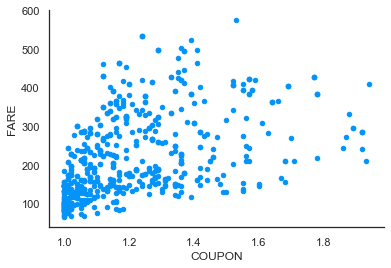

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  NEW


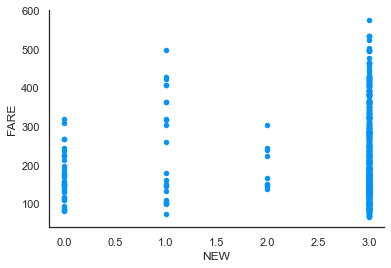

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  VACATION


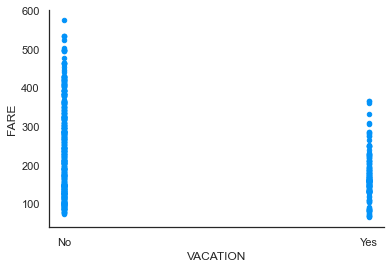

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  SW


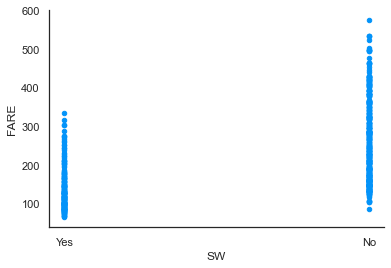

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  HI


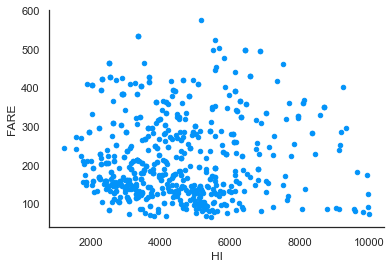

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  S_INCOME


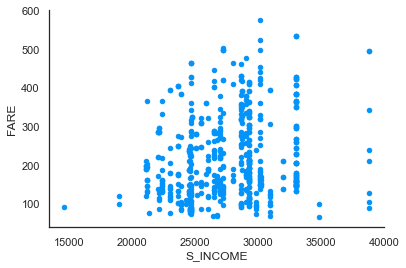

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  E_INCOME


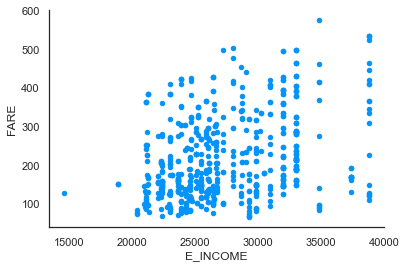

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  S_POP


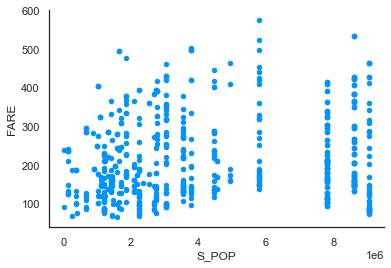

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  E_POP


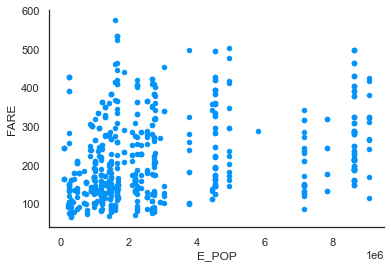

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  SLOT


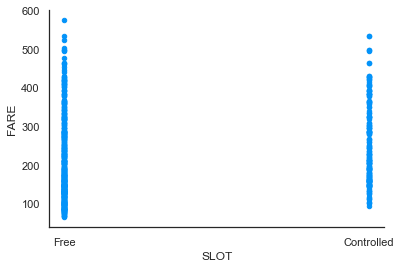

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  GATE


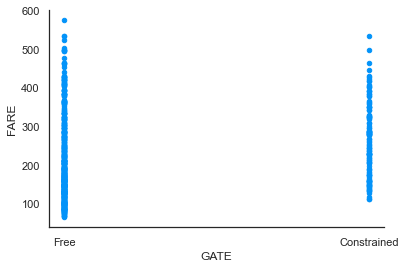

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  DISTANCE


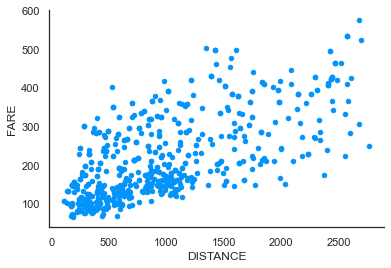

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Scatter Plot for  PAX


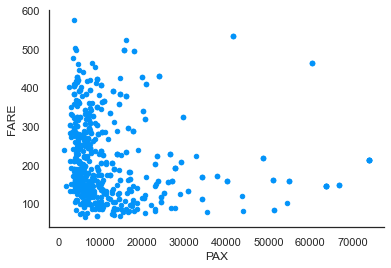

In [75]:
for i in predictors:
    print("Scatter Plot for ",i)
    AirF_df.plot.scatter(x = i, y = 'FARE')
    plt.show()

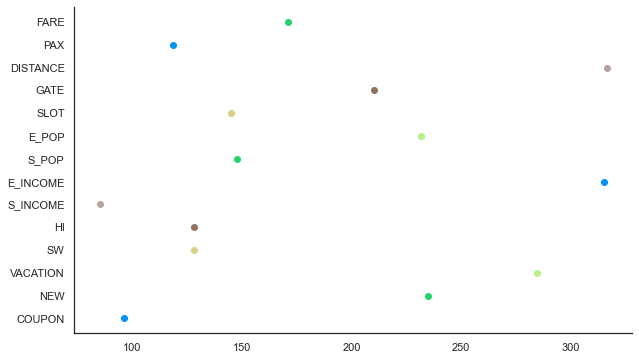

In [42]:
fig, ax = plt.subplots(figsize = (10, 6))

for x, y in zip(AirF_df['FARE'], AirF_df):
   plt.scatter(x, y, cmap="Paired")
plt.show()

**Qno. 2**
### Explore the categorical predictors by computing the percentage of flights in each category. Create a pivot table with the average fare in each category. Which categorical predictor seems best for predicting FARE? Explain your answer.

Ans- We observed that the percentages of flights in each category are approximately 70% and 30%.
We also noticed the effect of the variable SW has a significant impact on the average ticket price. Furthermore, we see that changing the SW variable resulted in a difference in average fare than changing the other variables.

Changes in the SW variable alone result in a significant decrease in the average fare.

In [43]:
table = pd.pivot_table(AirF_df, index=['VACATION'],aggfunc=np.sum)

table['% of Total'] = (table.FARE / table.FARE.sum() * 100).astype(str)

table 

,COUPON,DISTANCE,E_INCOME,E_POP,FARE,HI,NEW,PAX,S_INCOME,S_POP,% of Total
VACATION,,,,,,,,,,,
No,558.59,439631,13045773,1623827868,111952.99,2152607.35,1299,6048114,13210943,2309657597,79.64296291226938
Yes,208.50,182836,4603685,414265108,28615.60,681478.69,458,2106939,4499848,597711266,20.357037087730625


In [44]:
table = pd.pivot_table(AirF_df, index=['GATE'],aggfunc=np.sum)

table['% of Total'] = (table.FARE / table.FARE.sum() * 100).astype(str)
table

,COUPON,DISTANCE,E_INCOME,E_POP,FARE,HI,NEW,PAX,S_INCOME,S_POP,% of Total
GATE,,,,,,,,,,,
Constrained,145.78,110349,3503363,499401393,32709.32,618324.54,344,1719172,3540374,630314745,23.26929508220862
Free,621.31,512118,14146095,1538691583,107859.27,2215761.50,1413,6435881,14170417,2277054118,76.73070491779139


In [45]:
table = pd.pivot_table(AirF_df, index=['SLOT'],aggfunc=np.sum)

table['% of Total'] = (table.FARE / table.FARE.sum() * 100).astype(str)
table

,COUPON,DISTANCE,E_INCOME,E_POP,FARE,HI,NEW,PAX,S_INCOME,S_POP,% of Total
SLOT,,,,,,,,,,,
Controlled,220.11,179333,5296935,775285441,46150.72,716557.22,514,3250395,5292323,1073426418,32.83145971656968
Free,546.98,443134,12352523,1262807535,94417.87,2117528.82,1243,4904658,12418468,1833942445,67.16854028343032


In [46]:
table = pd.pivot_table(AirF_df, index=['SW'],aggfunc=np.sum)

table['% of Total'] = (table.FARE / table.FARE.sum() * 100).astype(str)

table

,COUPON,DISTANCE,E_INCOME,E_POP,FARE,HI,NEW,PAX,S_INCOME,S_POP,% of Total
SW,,,,,,,,,,,
No,545.08,478766,12662911,1595872487,113963.89,1992624.04,1241,5878444,12612519,2102146004,81.07351009211943
Yes,222.01,143701,4986547,442220489,26604.70,841462.00,516,2276609,5098272,805222859,18.92648990788056


**Qno. 3**
### Create data partition by assigning 80% of the records to the training dataset. Set the seed at 123 for replicability, if needed.

In [47]:
X = pd.get_dummies(AirF_df[predictors])
y = AirF_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=123)

In [48]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_No, VACATION_Yes, SW_No, SW_Yes, SLOT_Controlled, SLOT_Free, GATE_Constrained, GATE_Free
Start: score=5505.73
Step: score=5503.73, remove VACATION_No
Step: score=5501.73, remove SW_No
Step: score=5499.73, remove SLOT_Controlled
Step: score=5497.73, remove GATE_Constrained
Step: score=5495.77, remove COUPON
Step: score=5495.77, remove None
['NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free']


In [49]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -8.2387
       Root Mean Squared Error (RMSE) : 51.0406
            Mean Absolute Error (MAE) : 39.7894
          Mean Percentage Error (MPE) : -8.3243
Mean Absolute Percentage Error (MAPE) : 23.3005


In [50]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_No, VACATION_Yes, SW_No, SW_Yes, SLOT_Controlled, SLOT_Free, GATE_Constrained, GATE_Free
Start: score=6234.77, constant
Step: score=5933.82, add DISTANCE
Step: score=5797.27, add SW_No
Step: score=5635.02, add VACATION_No
Step: score=5579.48, add HI
Step: score=5558.76, add SLOT_Controlled
Step: score=5529.48, add GATE_Constrained
Step: score=5526.25, add E_POP
Step: score=5518.30, add S_POP
Step: score=5503.43, add PAX
Step: score=5498.73, add E_INCOME
Step: score=5497.36, add NEW
Step: score=5495.77, add S_INCOME
Step: score=5495.77, add None
['DISTANCE', 'SW_No', 'VACATION_No', 'HI', 'SLOT_Controlled', 'GATE_Constrained', 'E_POP', 'S_POP', 'PAX', 'E_INCOME', 'NEW', 'S_INCOME']


In [51]:
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -8.2387
       Root Mean Squared Error (RMSE) : 51.0406
            Mean Absolute Error (MAE) : 39.7894
          Mean Percentage Error (MPE) : -8.3243
Mean Absolute Percentage Error (MAPE) : 23.3005


**Qno. 4**
### Run a stepwise selection regression model to reduce the number of predictors. Discuss the results from this model.

Ans:- The number of predictors has been reduced using the stepwise selection regression model and only best_variables are selected from the model. As we know stepwise selection is a hybrid of forward and backward selection, it started it selection of variables step by step and removed those variables which did not improve our AIC score. At the end, we were left with 12 variables which gives the best score out of 17 variables.

In [52]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_No, VACATION_Yes, SW_No, SW_Yes, SLOT_Controlled, SLOT_Free, GATE_Constrained, GATE_Free
Start: score=6234.77, constant
Step: score=5933.82, add DISTANCE
Step: score=5797.27, add SW_No
Step: score=5635.02, add VACATION_No
Step: score=5579.48, add HI
Step: score=5558.76, add SLOT_Controlled
Step: score=5529.48, add GATE_Constrained
Step: score=5526.25, add E_POP
Step: score=5518.30, add S_POP
Step: score=5503.43, add PAX
Step: score=5498.73, add E_INCOME
Step: score=5497.36, add NEW
Step: score=5495.77, add S_INCOME
Step: score=5495.77, unchanged None
['DISTANCE', 'SW_No', 'VACATION_No', 'HI', 'SLOT_Controlled', 'GATE_Constrained', 'E_POP', 'S_POP', 'PAX', 'E_INCOME', 'NEW', 'S_INCOME']


In [53]:
tmp = regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -8.2387
       Root Mean Squared Error (RMSE) : 51.0406
            Mean Absolute Error (MAE) : 39.7894
          Mean Percentage Error (MPE) : -8.3243
Mean Absolute Percentage Error (MAPE) : 23.3005


**Qno. 5**
### Repeat the process in (4) using exhaustive search instead of forward selection.

In [54]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 200)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')


     n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Constrained  GATE_Free     HI    NEW    PAX  SLOT_Controlled  SLOT_Free  SW_No  SW_Yes  S_INCOME  S_POP  VACATION_No  \
0    1  0.446799  5933.824590   False      True     False  False             False      False  False  False  False            False      False  False   False     False  False        False   
1    2  0.577577  5797.266053   False      True     False  False             False      False  False  False  False            False      False   True   False     False  False        False   
2    3  0.693280  5635.021708   False      True     False  False             False      False  False  False  False            False      False  False    True     False  False         True   
3    4  0.725463  5579.480642   False      True     False  False             False      False   True  False  False            False      False   True   False     False  False        False   
4    5  0.736902  5558.763446   False      Tr

In [55]:
tmp1 = regressionSummary(valid_y, model.predict(valid_X[allVariables]))


Regression statistics

                      Mean Error (ME) : -8.2538
       Root Mean Squared Error (RMSE) : 51.0727
            Mean Absolute Error (MAE) : 39.8104
          Mean Percentage Error (MPE) : -8.3367
Mean Absolute Percentage Error (MAPE) : 23.3162


**Qno. 6**
### Compare the predictive accuracy of both models—stepwise selection and exhaustive search—using measures such as RMSE and average error.

Ans:- While comparing the two models stepwise selection and exhaustive search, using RMSE and average error we can interpret that exhaustive search has higher RMSE as well as mean error. But the difference is in 0.03 and 0.02 respectively. 

In [56]:
tmp = regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Regression statistics

                      Mean Error (ME) : -8.2387
       Root Mean Squared Error (RMSE) : 51.0406
            Mean Absolute Error (MAE) : 39.7894
          Mean Percentage Error (MPE) : -8.3243
Mean Absolute Percentage Error (MAPE) : 23.3005


In [57]:
tmp1 = regressionSummary(valid_y, model.predict(valid_X[allVariables]))


Regression statistics

                      Mean Error (ME) : -8.2538
       Root Mean Squared Error (RMSE) : 51.0727
            Mean Absolute Error (MAE) : 39.8104
          Mean Percentage Error (MPE) : -8.3367
Mean Absolute Percentage Error (MAPE) : 23.3162


In [58]:
data_final = pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

In [59]:
#higher values of R2adj indicate better fit
#models with smaller AIC and BIC values are considered better.
data_final

,n,r2adj,AIC,COUPON,DISTANCE,E_INCOME,E_POP,GATE_Constrained,GATE_Free,HI,NEW,PAX,SLOT_Controlled,SLOT_Free,SW_No,SW_Yes,S_INCOME,S_POP,VACATION_No,VACATION_Yes
0,1,0.446799,5933.824590,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,0.577577,5797.266053,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,3,0.693280,5635.021708,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,4,0.725463,5579.480642,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True
4,5,0.736902,5558.763446,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False
5,6,0.752064,5529.479248,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False
6,7,0.754106,5526.247739,False,True,False,True,False,True,True,False,False,False,True,True,False,False,False,True,False
7,8,0.758373,5518.302526,False,True,False,True,True,False,True,False,False,True,False,True,False,False,True,True,False
8,9,0.765769,5503.427717,False,True,False,True,True,False,True,False,True,True,False,True,False,False,True,True,False
9,10,0.768363,5498.727877,False,True,True,True,False,True,True,False,True,True,False,True,False,False,True,False,True


In [60]:
#Best Value
data = data_final.iloc[11][:]
print(data)

n                           12
r2adj                 0.770582
AIC                 5495.77157
COUPON                   False
DISTANCE                  True
E_INCOME                  True
E_POP                     True
GATE_Constrained          True
GATE_Free                False
HI                        True
NEW                       True
PAX                       True
SLOT_Controlled           True
SLOT_Free                False
SW_No                     True
SW_Yes                   False
S_INCOME                  True
S_POP                     True
VACATION_No               True
VACATION_Yes             False
Name: 11, dtype: object


**Qno. 7**
### Using the exhaustive search model, predict the average fare on a route with the following characteristics: COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = $28,760, E_INCOME = $27,664, S_POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782, DISTANCE = 1976 miles.

Ans- When we use the Exhaustive Search Method to predict the trained model on a given set of values, we get the average fare for the given values of each variable is $488.64.

In [61]:
train_X_ES = train_X[['DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free', 'HI', 'NEW', 'PAX', 'SLOT_Controlled', 'SW_No', 'S_INCOME', 'S_POP', 'VACATION_No']].copy()
valid_X_ES = valid_X[['DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free', 'HI', 'NEW', 'PAX', 'SLOT_Controlled', 'SW_No', 'S_INCOME', 'S_POP', 'VACATION_No']].copy()
train_y_ES = train_y.copy()
valid_y_ES = valid_y.copy()

train_X_ES

,DISTANCE,E_INCOME,E_POP,GATE_Free,HI,NEW,PAX,SLOT_Controlled,SW_No,S_INCOME,S_POP,VACATION_No
511,2489,30916,2230831,1,2705.03,3,4560,0,1,30124,5787293,1
298,428,25127,679984,1,5230.32,3,8724,0,0,29260,7830332,1
177,331,24725,1074558,1,4988.83,3,10255,0,1,26993,3532657,1
403,426,26101,1021830,1,3474.23,3,12883,1,1,32991,8621121,1
171,1379,24706,9056076,1,3942.83,3,11760,0,0,27211,3770125,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98,457,24348,111745,1,4840.48,3,7574,1,1,32991,8621121,1
322,947,22360,1421287,0,2386.85,3,54990,0,1,32991,8621121,0
382,543,26409,249561,1,5281.56,3,10016,0,0,29846,2237227,1
365,412,25054,2374260,0,4947.28,3,6585,0,1,29260,7830332,1


In [62]:
input_data = ({'DISTANCE':1976,'E_INCOME':27664, 'E_POP':3195503, 'GATE_Free': 1, 'HI':4442.141, 'NEW':3, 'PAX': 12782, 'SLOT_Controlled':0,
    'SW_No':0, 'S_INCOME':28760,'S_POP':45557004, 'VACATION_No': 1})

input_df = pd.DataFrame(input_data, index=[0])
input_df

,DISTANCE,E_INCOME,E_POP,GATE_Free,HI,NEW,PAX,SLOT_Controlled,SW_No,S_INCOME,S_POP,VACATION_No
0,1976,27664,3195503,1,4442.141,3,12782,0,0,28760,45557004,1


In [63]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X_ES[variables], train_y_ES)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X_ES[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y_ES, pred_y, model)

allVariables = train_X_ES.columns
results = exhaustive_search(allVariables, train_model, score_model)

In [64]:
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X_ES[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 200)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj          AIC  DISTANCE  E_INCOME  E_POP  GATE_Free     HI    NEW    PAX  SLOT_Controlled  SW_No  S_INCOME  S_POP  VACATION_No
0    1  0.446799  5933.824590      True     False  False      False  False  False  False            False  False     False  False        False
1    2  0.577577  5797.266053      True     False  False      False  False  False  False            False   True     False  False        False
2    3  0.693280  5635.021708      True     False  False      False  False  False  False            False   True     False  False         True
3    4  0.725463  5579.480642      True     False  False      False   True  False  False            False   True     False  False         True
4    5  0.736902  5558.763446      True     False  False      False   True  False  False             True   True     False  False         True
5    6  0.752064  5529.479248      True     False  False       True   True  False  False             True   True     False  False         True

In [65]:
y_pred = model.predict(input_df)
print(y_pred)

[488.64078277]


**Qno. 8**
### Predict the reduction in average fare on the route in question (7.), if Southwest decides to serve this route.

Ans- When SW decided to cover the route, the predicted average fare was $537.84.
When SW did not cover the route, the predicted average fare was $488.64.

If Southwest decides to cover the route, the reduction in the predicted average fare = $49.20.

In [66]:
train_X_ES = train_X[['DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free', 'HI', 'NEW', 'PAX', 'SLOT_Controlled', 'SW_Yes', 'S_INCOME', 'S_POP', 'VACATION_No']].copy()
valid_X_ES = valid_X[['DISTANCE', 'E_INCOME', 'E_POP', 'GATE_Free', 'HI', 'NEW', 'PAX', 'SLOT_Controlled', 'SW_Yes', 'S_INCOME', 'S_POP', 'VACATION_No']].copy()
train_y_ES = train_y.copy()
valid_y_ES = valid_y.copy()

train_X_ES

,DISTANCE,E_INCOME,E_POP,GATE_Free,HI,NEW,PAX,SLOT_Controlled,SW_Yes,S_INCOME,S_POP,VACATION_No
511,2489,30916,2230831,1,2705.03,3,4560,0,0,30124,5787293,1
298,428,25127,679984,1,5230.32,3,8724,0,1,29260,7830332,1
177,331,24725,1074558,1,4988.83,3,10255,0,0,26993,3532657,1
403,426,26101,1021830,1,3474.23,3,12883,1,0,32991,8621121,1
171,1379,24706,9056076,1,3942.83,3,11760,0,1,27211,3770125,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98,457,24348,111745,1,4840.48,3,7574,1,0,32991,8621121,1
322,947,22360,1421287,0,2386.85,3,54990,0,0,32991,8621121,0
382,543,26409,249561,1,5281.56,3,10016,0,1,29846,2237227,1
365,412,25054,2374260,0,4947.28,3,6585,0,0,29260,7830332,1


In [67]:
AirF_lm_ES = LinearRegression()
AirF_lm_ES.fit(train_X_ES, train_y_ES)

input_data = ({'DISTANCE':1976,'E_INCOME':27664, 'E_POP':3195503, 'GATE_Free': 1, 'HI':4442.141, 'NEW':3, 'PAX': 12782, 'SLOT_Controlled':0,
    'SW_Yes':0, 'S_INCOME':28760,'S_POP':45557004, 'VACATION_No': 1})

input_df = pd.DataFrame(input_data, index=[0])
input_df

,DISTANCE,E_INCOME,E_POP,GATE_Free,HI,NEW,PAX,SLOT_Controlled,SW_Yes,S_INCOME,S_POP,VACATION_No
0,1976,27664,3195503,1,4442.141,3,12782,0,0,28760,45557004,1


In [68]:
y_pred1 = AirF_lm_ES.predict(input_df)
print(y_pred1)

[537.84832751]


In [69]:
pred = y_pred1 - y_pred
print(pred)

[49.20754474]
